# PRCP - 1024 - TEXAS_SALARY_PREDICTION

In [1]:
#importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Collecting of dataset

In [2]:
df = pd.read_csv("salary.csv") # using pandas to read the csv file
df

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,...,12.93000,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns # listing out no. of columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

In [4]:
df.rename(columns = {
    'AGENCY':'agency', 
    'AGENCY NAME':'agency_name', 
    'LAST NAME': 'last_name', 
    'FIRST NAME': 'first_name', 
    'MI': 'middle_name', 
    'CLASS CODE': 'class_code',
    'CLASS TITLE': 'class_title', 
    'ETHNICITY': 'ethnicity', 
    'GENDER': 'gender', 
    'STATUS': 'status', 
    'EMPLOY DATE': 'employee_date',
    'HRLY RATE': 'hourly_rate', 
    'HRS PER WK': 'hours_per_week', 
    'MONTHLY': 'monthly_income', 
    'ANNUAL': 'annual_income', 
    'STATE NUMBER': 'state_number'
}, inplace = True)  # renaming the column name using pandas library

In [5]:
df.head()

,agency,agency_name,last_name,first_name,middle_name,class_code,class_title,ethnicity,gender,status,...,hourly_rate,hours_per_week,monthly_income,annual_income,state_number,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


In [6]:
df.shape # checking out no. of rows and columns 

(149481, 21)

In [7]:
df.info() # checking out basic information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   agency                   149481 non-null  int64  
 1   agency_name              149481 non-null  object 
 2   last_name                149481 non-null  object 
 3   first_name               149481 non-null  object 
 4   middle_name              149481 non-null  object 
 5   class_code               149481 non-null  object 
 6   class_title              149481 non-null  object 
 7   ethnicity                149481 non-null  object 
 8   gender                   149481 non-null  object 
 9   status                   149481 non-null  object 
 10  employee_date            149481 non-null  object 
 11  hourly_rate              149481 non-null  float64
 12  hours_per_week           149481 non-null  float64
 13  monthly_income           149481 non-null  float64
 14  annu

#### ANALYSIS : There are few columns which has large number of null values. 

In [8]:
df.isnull().sum() # checking of null values

agency                          0
agency_name                     0
last_name                       0
first_name                      0
middle_name                     0
class_code                      0
class_title                     0
ethnicity                       0
gender                          0
status                          0
employee_date                   0
hourly_rate                     0
hours_per_week                  0
monthly_income                  0
annual_income                   0
state_number                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

#### duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search have large number of null values, dropping of preferable null columns makes the model building precise

## Data pre_processing

In [9]:
# dropping out some of null values columns
df = df.drop(['duplicated','multiple_full_time_jobs','combined_multiple_jobs','hide_from_search'], axis = 1)

In [10]:
df.head() #summed_annual_salary is kept for analysing total compensation

,agency,agency_name,last_name,first_name,middle_name,class_code,class_title,ethnicity,gender,status,employee_date,hourly_rate,hours_per_week,monthly_income,annual_income,state_number,summed_annual_salary
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,131407.08
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,NaN
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115,131407.08
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115,NaN
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030,NaN


In [11]:
# Concatenate 'First_Name', 'Middle_Name', and 'Last_Name' into 'Full_Name'
df['full_name'] = df['first_name'] + ' '  + df['last_name'] +' ' + df['middle_name'].fillna('') 
# Removing extra spaces from missing middle names or last names
df['full_name'] = df['full_name'].str.replace('       ', ' ')
# Save the file
df.to_csv('updated_full_names.csv', index=False)

In [12]:
df.head()

,agency,agency_name,last_name,first_name,middle_name,class_code,class_title,ethnicity,gender,status,employee_date,hourly_rate,hours_per_week,monthly_income,annual_income,state_number,summed_annual_salary,full_name
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,131407.08,MORTON RUCKER V
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,NaN,MORTON RUCKER V
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115,131407.08,JOHN SPECIA JR J
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115,NaN,JOHN SPECIA JR J
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030,NaN,ESTHER ONTIVEROS


In [13]:
df.insert(2, 'full_name', df.pop('full_name')) # changing the place of column into 2nd column
df

,agency,agency_name,full_name,last_name,first_name,middle_name,class_code,class_title,ethnicity,gender,status,employee_date,hourly_rate,hours_per_week,monthly_income,annual_income,state_number,summed_annual_salary
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",MORTON RUCKER V,RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,131407.08
1,212,OFFICE OF COURT ADMINISTRATION ...,MORTON RUCKER V,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,NaN
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",JOHN SPECIA JR J,SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115,131407.08
3,212,OFFICE OF COURT ADMINISTRATION ...,JOHN SPECIA JR J,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115,NaN
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ESTHER ONTIVEROS,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,JOHN WESSELS P,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00000,40.0,2899.00,34788.00,770781,NaN
149477,809,STATE PRESERVATION BOARD ...,EVAN WINDHAM A,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00000,40.0,5500.00,66000.00,847431,NaN
149478,809,STATE PRESERVATION BOARD ...,DERRICK WRIGHT C,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93000,20.0,1120.60,13447.20,34266,NaN
149479,809,STATE PRESERVATION BOARD ...,DOUGLAS YOUNG R,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00000,40.0,5744.16,68929.92,123490,NaN


In [14]:
df = df.drop(['last_name','first_name','middle_name'],axis = 1)

In [15]:
df.columns

Index(['agency', 'agency_name', 'full_name', 'class_code', 'class_title',
       'ethnicity', 'gender', 'status', 'employee_date', 'hourly_rate',
       'hours_per_week', 'monthly_income', 'annual_income', 'state_number',
       'summed_annual_salary'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   agency                149481 non-null  int64  
 1   agency_name           149481 non-null  object 
 2   full_name             149481 non-null  object 
 3   class_code            149481 non-null  object 
 4   class_title           149481 non-null  object 
 5   ethnicity             149481 non-null  object 
 6   gender                149481 non-null  object 
 7   status                149481 non-null  object 
 8   employee_date         149481 non-null  object 
 9   hourly_rate           149481 non-null  float64
 10  hours_per_week        149481 non-null  float64
 11  monthly_income        149481 non-null  float64
 12  annual_income         149481 non-null  float64
 13  state_number          149481 non-null  int64  
 14  summed_annual_salary  16 non-null      float64
dtype

In [17]:
df.describe() # checking out stastical data (mean, standard deviation)

,agency,hourly_rate,hours_per_week,monthly_income,annual_income,state_number,summed_annual_salary
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05,16.000000
mean,545.736288,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05,74303.955000
std,139.057691,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05,51925.944282
min,101.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00,18000.000000
25%,529.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05,32962.500000
50%,530.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05,48063.300000
75%,696.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06,123751.770000
max,930.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06,171383.400000


In [18]:
# code to know the value counts of categorical columns
for column in df.select_dtypes(include='object').columns: 
    print(f"Value counts for column '{column}':")
    print("                      ")
    print(df[column].value_counts())
    print("                       ")
    print("********************************END**************************************")
    print("                        ")

Value counts for column 'agency_name':
                      
HEALTH AND HUMAN SERVICES COMMISSION                  36667
TEXAS DEPARTMENT OF CRIMINAL JUSTICE                  35926
TEXAS DEPARTMENT OF TRANSPORTATION                    13099
DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES          12588
DEPARTMENT OF PUBLIC SAFETY                           10097
                                                      ...  
HEALTH PROFESSIONS COUNCIL                                7
BOARD OF PROFESSIONAL GEOSCIENTISTS                       5
OFFICE OF STATE PROSECUTING ATTORNEY                      4
BOARD OF PROFESSIONAL LAND SURVEYING                      4
TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL                 1
Name: agency_name, Length: 113, dtype: int64
                       
********************************END**************************************
                        
Value counts for column 'full_name':
                      
DIANA        GARCIA            7
JESUS        GARC

In [19]:
# code to find out the people who are benefit with compensation
df['annual_income'] = pd.to_numeric(df['annual_income'], errors='coerce')
df['summed_annual_salary'] = pd.to_numeric(df['summed_annual_salary'], errors='coerce')

# Subtracting the columns and store the result in a new column named as 'total_compensation'
df['total_compensation'] =  df['summed_annual_salary'] - df['annual_income']

# Display the first 5 rows 
print(df[['annual_income', 'summed_annual_salary', 'total_compensation']].head())

   annual_income  summed_annual_salary  total_compensation
0      114549.84             131407.08            16857.24
1       16857.24                   NaN                 NaN
2      114549.84             131407.08            16857.24
3       16857.24                   NaN                 NaN
4       39411.24                   NaN                 NaN


<Axes: >

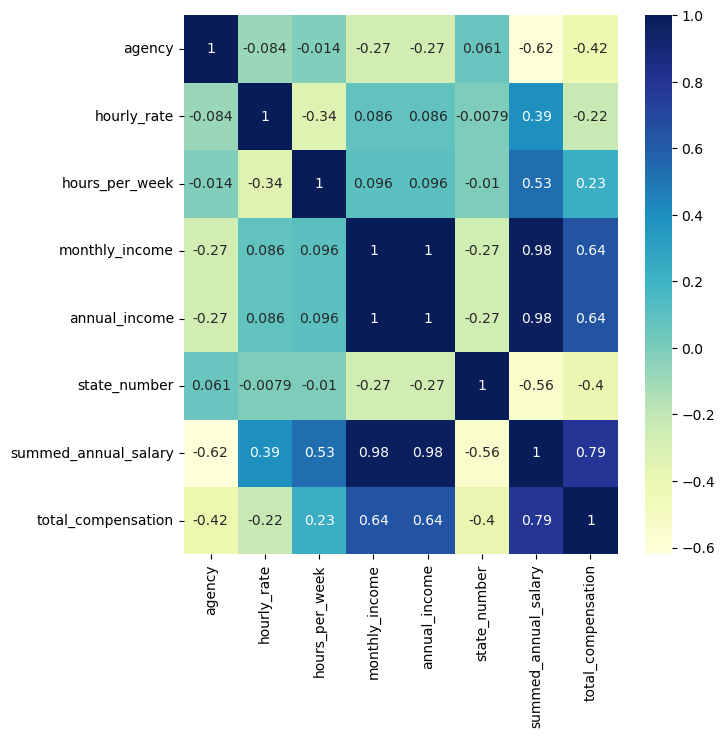

In [20]:
plt.figure(figsize=(7,7)) 
sns.heatmap(df.corr(), annot=True,cmap="YlGnBu") # checking out the correlation of each column 

#### Analysis: Here, annual_income, monthly_income are corelated, so keep any one of the column dropping out the similiar columns (annual_income column dropped)

In [21]:
df = df.drop('annual_income',axis = 1) 
df

,agency,agency_name,full_name,class_code,class_title,ethnicity,gender,status,employee_date,hourly_rate,hours_per_week,monthly_income,state_number,summed_annual_salary,total_compensation
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",MORTON RUCKER V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,127717,131407.08,16857.24
1,212,OFFICE OF COURT ADMINISTRATION ...,MORTON RUCKER V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,127717,NaN,NaN
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",JOHN SPECIA JR J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,59115,131407.08,16857.24
3,212,OFFICE OF COURT ADMINISTRATION ...,JOHN SPECIA JR J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,59115,NaN,NaN
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ESTHER ONTIVEROS,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,165030,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,JOHN WESSELS P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00000,40.0,2899.00,770781,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,EVAN WINDHAM A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00000,40.0,5500.00,847431,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,DERRICK WRIGHT C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93000,20.0,1120.60,34266,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,DOUGLAS YOUNG R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00000,40.0,5744.16,123490,NaN,NaN


<Axes: >

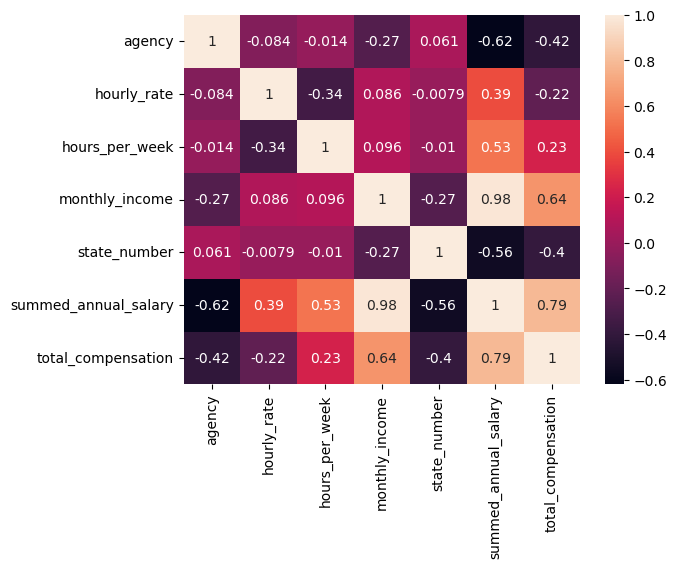

In [22]:
sns.heatmap(df.corr(),annot = True)

In [23]:
df.shape 

(149481, 15)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   agency                149481 non-null  int64  
 1   agency_name           149481 non-null  object 
 2   full_name             149481 non-null  object 
 3   class_code            149481 non-null  object 
 4   class_title           149481 non-null  object 
 5   ethnicity             149481 non-null  object 
 6   gender                149481 non-null  object 
 7   status                149481 non-null  object 
 8   employee_date         149481 non-null  object 
 9   hourly_rate           149481 non-null  float64
 10  hours_per_week        149481 non-null  float64
 11  monthly_income        149481 non-null  float64
 12  state_number          149481 non-null  int64  
 13  summed_annual_salary  16 non-null      float64
 14  total_compensation    16 non-null      float64
dtype

In [25]:
df.class_code.value_counts()

4504        9267
4505        7895
4503        4718
5622        3646
5121        3307
            ... 
U101           1
U104           1
E176           1
U103           1
E096           1
Name: class_code, Length: 1481, dtype: int64

In [26]:
df.class_title.value_counts()

CORREC  OFFICER IV                                    9267
CORREC  OFFICER V                                     7895
CORREC OFFCR III                                      4718
TEXAS WORKS ADVISOR II                                3646
DIRECT SUPPORT PROFESSIONAL I                         3307
                                                      ... 
CHAIR,PARDONS AND PAROLES                                1
STATISTICIAN II                                          1
EX DIRECTOR TDCJ                                         1
PAYROLL SPECIALIST I                                     1
DEPUTY DIR/APPS MGR                                      1
Name: class_title, Length: 1422, dtype: int64

In [27]:
df.agency.value_counts()

529    36667
696    35926
601    13099
530    12588
405    10097
       ...  
364        7
481        5
213        4
464        4
510        1
Name: agency, Length: 113, dtype: int64

In [28]:
df.agency_name.value_counts()

HEALTH AND HUMAN SERVICES COMMISSION                  36667
TEXAS DEPARTMENT OF CRIMINAL JUSTICE                  35926
TEXAS DEPARTMENT OF TRANSPORTATION                    13099
DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES          12588
DEPARTMENT OF PUBLIC SAFETY                           10097
                                                      ...  
HEALTH PROFESSIONS COUNCIL                                7
BOARD OF PROFESSIONAL GEOSCIENTISTS                       5
OFFICE OF STATE PROSECUTING ATTORNEY                      4
BOARD OF PROFESSIONAL LAND SURVEYING                      4
TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL                 1
Name: agency_name, Length: 113, dtype: int64

#### Analysis: class_code and class_tile are showing the same value_counts as well, agency & agency_name are also showing the same value_counts. Dropping out any one of the column for better model building

In [29]:
df = df.drop(['agency','class_code'],axis = 1)
df

,agency_name,full_name,class_title,ethnicity,gender,status,employee_date,hourly_rate,hours_per_week,monthly_income,state_number,summed_annual_salary,total_compensation
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",MORTON RUCKER V,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,127717,131407.08,16857.24
1,OFFICE OF COURT ADMINISTRATION ...,MORTON RUCKER V,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,127717,NaN,NaN
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",JOHN SPECIA JR J,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,59115,131407.08,16857.24
3,OFFICE OF COURT ADMINISTRATION ...,JOHN SPECIA JR J,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,59115,NaN,NaN
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ESTHER ONTIVEROS,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,165030,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,STATE PRESERVATION BOARD ...,JOHN WESSELS P,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00000,40.0,2899.00,770781,NaN,NaN
149477,STATE PRESERVATION BOARD ...,EVAN WINDHAM A,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00000,40.0,5500.00,847431,NaN,NaN
149478,STATE PRESERVATION BOARD ...,DERRICK WRIGHT C,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93000,20.0,1120.60,34266,NaN,NaN
149479,STATE PRESERVATION BOARD ...,DOUGLAS YOUNG R,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00000,40.0,5744.16,123490,NaN,NaN


## Exploratory data analysis

<Axes: xlabel='gender', ylabel='count'>

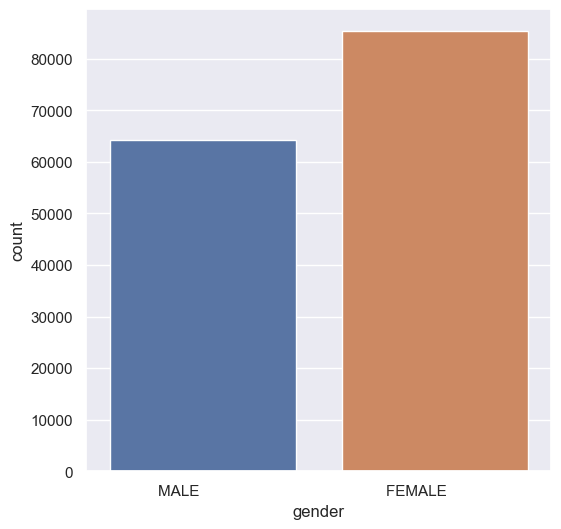

In [30]:
# plotting the graphical distribution of various columns
plt.figure(figsize =(6,6))
sns.set(style="darkgrid")
sns.countplot(x= 'gender', data=df)

#### Analysis: when comes to Gender Female employee are more compared to Male employee

<Axes: xlabel='ethnicity', ylabel='count'>

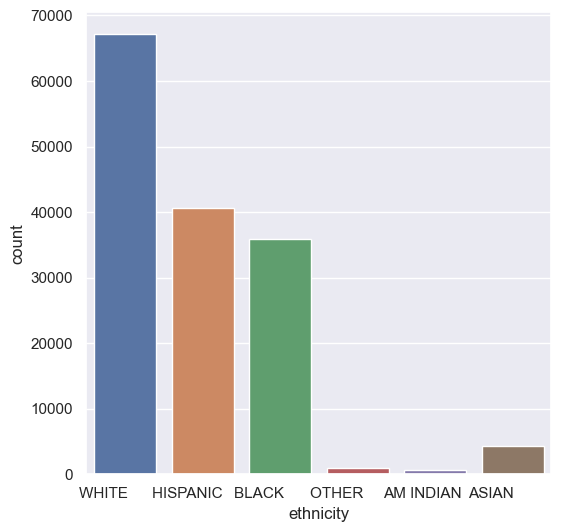

In [31]:
plt.figure(figsize =(6,6))
sns.countplot(x= 'ethnicity', data=df)

#### Analysis: White people are large in number(>60000), Hispanic and black people almost same number of people are working(>35000), where as Indians are very less number(<5000), some are others too

<Axes: xlabel='count', ylabel='status'>

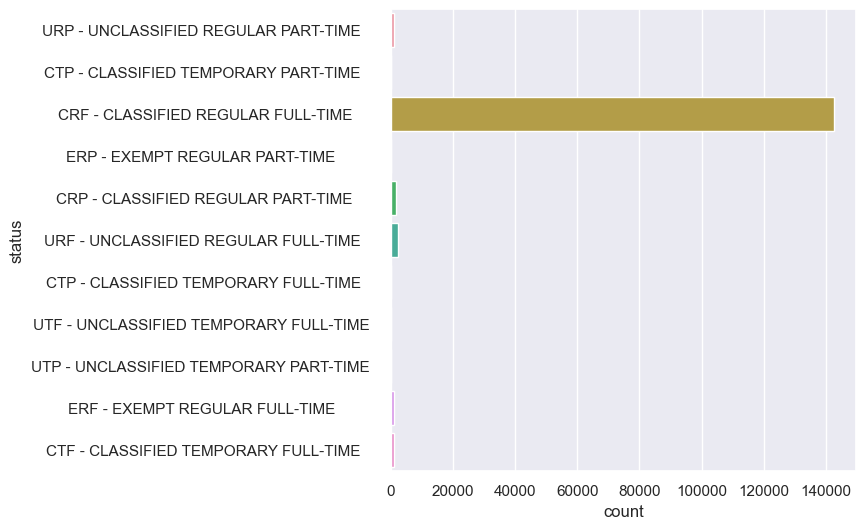

In [32]:
plt.figure(figsize =(6,6))
sns.countplot(y= 'status', data=df)

#### Analysis: Most of the people working as a Full time employee, some are working as unclassified full time employee, some are working as part time people are working as classified and unclassified employee

## Task 1 : Checking for outliers in terms of salary

<Axes: xlabel='monthly_income'>

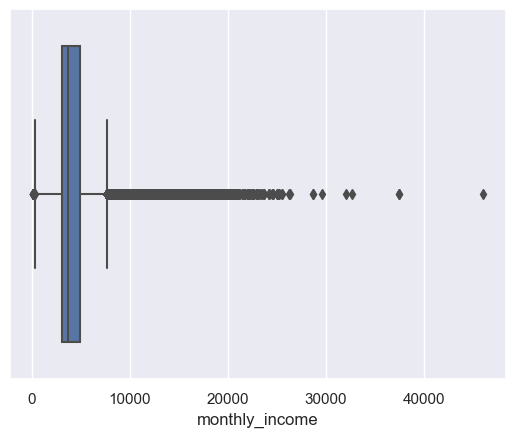

In [33]:
sns.boxplot(x = 'monthly_income', data = df )

#### Analysis: Mostly of peopel lies int the category which is less than 10000, some are greater than 20000 which are outliers

In [34]:
df['monthly_income'].describe()

count    149481.000000
mean       4226.184248
std        2093.111691
min          50.000000
25%        3019.840000
50%        3720.170000
75%        4865.810000
max       46125.000000
Name: monthly_income, dtype: float64

### Finding Z-score

In [35]:
# using Z-score method eliminate the rows who are far away from the distribution
df['monthly_income_zscore'] = (df['monthly_income'] - df['monthly_income'].mean()) / df['monthly_income'].std()
df['monthly_income_zscore']

0         2.541496
1        -1.347952
2         2.541496
3        -1.347952
4        -0.450007
            ...   
149476   -0.634072
149477    0.608575
149478   -1.483716
149479    0.725224
149480   -1.532992
Name: monthly_income_zscore, Length: 149481, dtype: float64

In [36]:
outliers_zscore = df[np.abs(df['monthly_income_zscore']) > 3]
outliers_zscore

,agency_name,full_name,class_title,ethnicity,gender,status,employee_date,hourly_rate,hours_per_week,monthly_income,state_number,summed_annual_salary,total_compensation,monthly_income_zscore
5,OFFICE OF THE ATTORNEY GENERAL ...,SHAUNA ROGERS,DIRECTOR IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,04/01/20,0.0,40.0,12899.00,1177785,NaN,NaN,4.143504
39,SENATE ...,DOUGLAS CLEMENTS M,LEG. OFFICIAL/ADMINISTRATOR ...,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,01/04/10,0.0,40.0,11150.00,136572,NaN,NaN,3.307906
42,SENATE ...,JAMES CRABTREE E,LEG. OFFICIAL/ADMINISTRATOR ...,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,10/01/16,0.0,40.0,10833.33,181420,NaN,NaN,3.156614
55,SENATE ...,ANGUS LUPTON C,LEG. OFFICIAL/ADMINISTRATOR ...,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,04/13/06,0.0,40.0,10850.00,148005,NaN,NaN,3.164578
71,SENATE ...,CHRISTOPHER STEINBACH J,LEG. OFFICIAL/ADMINISTRATOR ...,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,12/23/14,0.0,40.0,13000.00,189382,NaN,NaN,4.191757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149304,STATE PRESERVATION BOARD ...,BOB CASH C,DEPUTY DIRECTOR I ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,01/01/14,0.0,40.0,12483.34,514276,NaN,NaN,3.944919
149335,STATE PRESERVATION BOARD ...,LINDA GABY L,DIRECTOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/06/95,0.0,40.0,10721.97,103114,NaN,NaN,3.103411
149359,STATE PRESERVATION BOARD ...,ALICE JAMES B,DIRECTOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/14/91,0.0,40.0,10734.72,185386,NaN,NaN,3.109502
149374,STATE PRESERVATION BOARD ...,MARGARET KOCH M,DIRECTOR IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,01/23/13,0.0,40.0,10583.34,336971,NaN,NaN,3.037179


#### Analysis: There 2617 people who bought salary more than 10,000

In [37]:
outliers_zscore = df[np.abs(df['monthly_income_zscore']) > 3]['class_title'].value_counts()
outliers_zscore

DISTRICT JUDGE, ACTIVE                                472
DIRECTOR IV                                           224
DIRECTOR VI                                           201
DIRECTOR III                                          158
CRIMINAL DISTRICT ATTORNEY                            154
                                                     ... 
SR INV ASSOCIATE, LONDON                                1
CHIEF COMPLIANCE OFFICER                                1
MANAGER VI                                              1
LEAD INVESTMENT ATTORNEY                                1
EXECUTIVE ADMINISTRATOR, WATER                          1
Name: class_title, Length: 185, dtype: int64

#### Analysis : listing out who are the people having higher income, they are Judge, Director, attorney etc.., Below code shows that the list of people who are paid for higher salary range.

In [38]:
import pandas as pd
import numpy as np
#listing out people who are fall into outliers
df['monthly_income_zscore'] = (df['monthly_income'] - df['monthly_income'].mean()) / df['monthly_income'].std()
outliers_zscore = df[np.abs(df['monthly_income_zscore']) > 3]['class_title'].unique()

print("Outliers using Z-score:")
display(outliers_zscore)

Outliers using Z-score:


array(['DIRECTOR IV                                       ',
       'LEG. OFFICIAL/ADMINISTRATOR                       ',
       'DIRECTOR VI                                       ',
       'DIRECTOR V                                        ',
       'EXEC DIRECTOR                                     ',
       'DEPUTY DIR, LEGAL                                 ',
       'LEG OFFICIAL/ADMINISTRATOR                        ',
       'DIR, INFO SYSTEMS                                 ',
       'SPECIAL COUNSEL                                   ',
       'GENERAL COUNSEL                                   ',
       'DIR, LEGAL DIV                                    ',
       'CHIEF FINANCIAL OFFICER                           ',
       'DEPUTY DIR/APPS MGR                               ',
       'ASST EXEC DIRECTOR                                ',
       'DIR, DOC PROD                                     ',
       'DIR, RESEARCH                                     ',
       'DIRECTOR        

## Remove the outliers

In [39]:
# Calculate the Z-score for the 'monthly_income' column
df['monthly_income_zscore'] = (df['monthly_income'] - df['monthly_income'].mean()) / df['monthly_income'].std()

# Drop rows where the Z-score is greater than 3
df_1 = df[df['monthly_income_zscore'] <= 3].copy()

# Droping the columns for finding 'z_score' 
df_1.drop(columns=['monthly_income_zscore'], inplace=True)

# The df_cleaned DataFrame now has the outliers removed
print(f"Original DataFrame size: {df.shape}")
print(f"DataFrame size after removing outliers: {df_1.shape}")


Original DataFrame size: (149481, 14)
DataFrame size after removing outliers: (146864, 13)


<Axes: xlabel='monthly_income'>

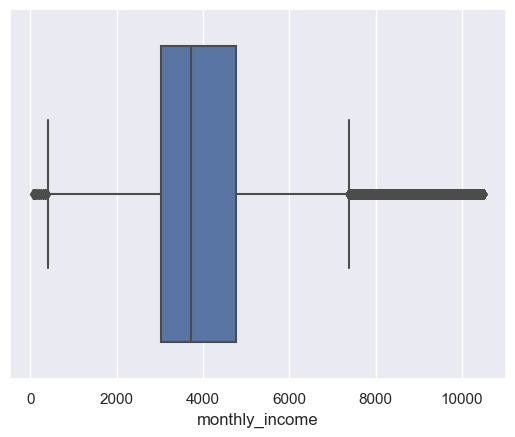

In [40]:
sns.boxplot(x='monthly_income', data = df_1)

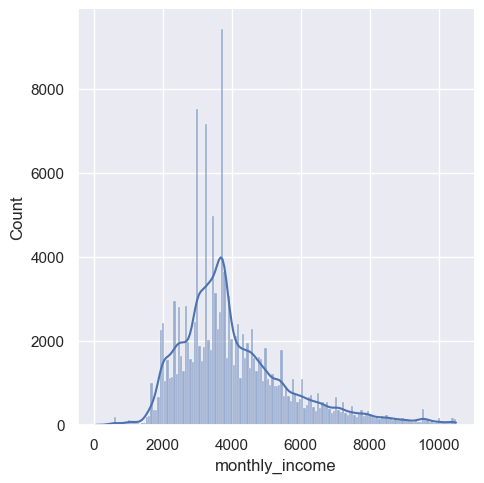

In [41]:
sns.displot(x= 'monthly_income',data = df_1, kde=True)

#### Analysis : Dropping out the outliers which focus on people in the range of normal distribution (0-10000)

## Task 2 : Biggest wage difference between managers and employee in Agency_name

In [42]:
# Filtering the managers and employees using condition
df['is_manager'] = df['class_title'].apply(lambda x: 'Manager' if 'OFFICER' in x or 'DIRECTOR' in x or 'ADMINISTRATOR' in x or 'ATTORNEY' in x else 'Non-manager')
print("__________________Total number of people in Managers role and Employees role______________________")
display(df.is_manager.value_counts())

# Grouping the agency and role, calculate average monthly income
income_stats = df.groupby(['agency_name', 'is_manager'])['monthly_income'].mean().unstack(fill_value=0)
display(income_stats)

# Calculate disparity (absolute difference between manager income and non-manager income)
income_stats['disparity'] = (income_stats.get('Manager', 0) - income_stats.get('Non-manager', 0))
display(income_stats['disparity'])

csv_file_path = 'income_disparity_stats.csv'
income_stats.to_csv(csv_file_path)

# Finding the department with the highest income disparity
max_income_disparity_agency = income_stats['disparity'].idxmax()
max_income_disparity_value = income_stats['disparity'].max()

# Output the result
print(f"The agency with the most income disparity is with : {max_income_disparity_agency} with a disparity of ${max_income_disparity_value:.2f}")


__________________Total number of people in Managers role and Employees role______________________


Non-manager    125846
Manager         23635
Name: is_manager, dtype: int64

is_manager,Manager,Non-manager
agency_name,,
ALCOHOLIC BEVERAGE COMMISSION,8712.429545,4794.553763
BOARD OF ARCHITECTURAL EXAMINERS,12133.720000,6260.423889
BOARD OF CHIROPRACTIC EXAMINERS,6309.580000,5011.047500
BOARD OF DENTAL EXAMINERS,6699.778889,3994.334255
BOARD OF EXAMINERS OF PSYCHOLOGISTS,5000.000000,3827.065714
...,...,...
THIRD COURT OF APPEALS DISTRICT,7708.340000,8222.168125
THIRTEENTH COURT OF APPEALS DISTRICT,8109.461538,8486.920588
TREASURY SAFEKEEPING TRUST COMPANY,14823.908333,8812.648983


agency_name
ALCOHOLIC BEVERAGE COMMISSION                         3917.875783
BOARD OF ARCHITECTURAL EXAMINERS                      5873.296111
BOARD OF CHIROPRACTIC EXAMINERS                       1298.532500
BOARD OF DENTAL EXAMINERS                             2705.444634
BOARD OF EXAMINERS OF PSYCHOLOGISTS                   1172.934286
                                                         ...     
THIRD COURT OF APPEALS DISTRICT                       -513.828125
THIRTEENTH COURT OF APPEALS DISTRICT                  -377.459050
TREASURY SAFEKEEPING TRUST COMPANY                    6011.259350
TWELFTH COURT OF APPEALS DISTRICT                     -865.697500
WATER DEVELOPMENT BOARD                               3527.129541
Name: disparity, Length: 113, dtype: float64

The agency with the most income disparity is with : TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL          with a disparity of $10000.00


In [43]:
# showing the particular row which is having higher disparity
department_name = 'TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL '

matching_agencies = df[df['agency_name'].str.contains(department_name, case=False, na=False)]

print(f"Agencies that contain '{department_name}' in their names:")
display(matching_agencies)

Agencies that contain 'TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL ' in their names:


,agency_name,full_name,class_title,ethnicity,gender,status,employee_date,hourly_rate,hours_per_week,monthly_income,state_number,summed_annual_salary,total_compensation,monthly_income_zscore,is_manager
7,TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL ...,DARREL SPINKS D,DIRECTOR IV ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,03/01/20,0.0,40.0,10000.0,147334,171383.4,51383.4,2.758484,Manager


#### 1. Agency name = 'TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL' 
#### 2. Name & Role = Darrel Spinks D - 'DIRECTOR IV , plays major role in wage disparity

## Biggest wage disparities between managers and employees in ethnicity

In [44]:
display(df.is_manager.value_counts())

# Grouped in terms of department and role
salary_comparison = df.groupby(['ethnicity', 'is_manager'])['monthly_income'].mean().unstack()

# Calculate the disparity between managers and employees
salary_comparison['disparity'] = salary_comparison['Manager'] - salary_comparison['Non-manager']

print("___________________Wage difference between Managers and Employeers in terms of ETHNICITY_____________________________")
display(salary_comparison.sort_values(by='disparity', ascending=False))

max_income_disparity_ethnicity = salary_comparison['disparity'].idxmax()
max_income_disparity_value = salary_comparison['disparity'].max()

# Output the result
print(f"The ethnicity with the most income disparity is with : {max_income_disparity_ethnicity} with a disparity of ${max_income_disparity_value:.2f}")

Non-manager    125846
Manager         23635
Name: is_manager, dtype: int64

___________________Wage difference between Managers and Employeers in terms of ETHNICITY_____________________________


is_manager,Manager,Non-manager,disparity
ethnicity,,,
OTHER,5283.489109,3612.111890,1671.377219
WHITE,5670.331976,4491.392844,1178.939132
HISPANIC,4412.867976,3870.557979,542.309998
AM INDIAN,4640.041383,4230.665599,409.375784
ASIAN,5592.430323,5269.361989,323.068334
BLACK,3695.334415,3577.871234,117.463181


The ethnicity with the most income disparity is with : OTHER           with a disparity of $1671.38


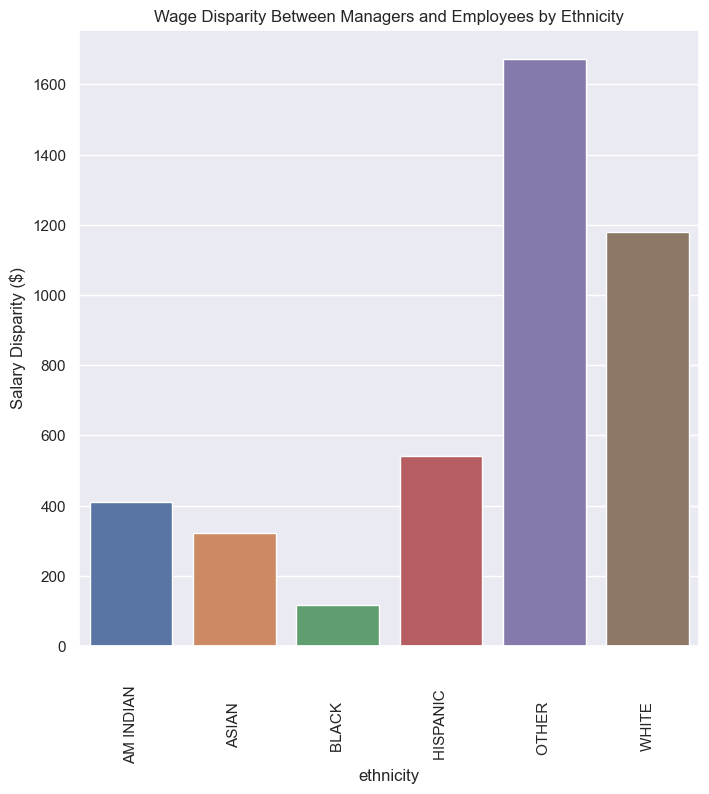

In [45]:
salary_comparison = salary_comparison.reset_index()

plt.figure(figsize=(8, 8))
sns.barplot(x='ethnicity', y='disparity', data=salary_comparison)
plt.xticks(rotation=90)
plt.title('Wage Disparity Between Managers and Employees by Ethnicity')
plt.ylabel('Salary Disparity ($)')
plt.show()

#### Analysis: Wage disparity in terms of Ethniciy, Black people will have less wage disaprity(<200) when compared to white people disparity(>1000), the people who are comes under OTHER category faces huge wage disparity (>1600)

## Biggest wage disparities between managers and employees in particular Agency_name

### Sample analysis on HEALTH AND HUMAN SERVICES COMMISSION

In [46]:

department_name = 'HEALTH AND HUMAN SERVICES COMMISSION'

matching_agencies = df[df['agency_name'].str.contains(department_name, case=False, na=False)]

print(f"Agencies that contain '{department_name}' in their names:")
display(matching_agencies)
df_dept = matching_agencies

Agencies that contain 'HEALTH AND HUMAN SERVICES COMMISSION' in their names:


,agency_name,full_name,class_title,ethnicity,gender,status,employee_date,hourly_rate,hours_per_week,monthly_income,state_number,summed_annual_salary,total_compensation,monthly_income_zscore,is_manager
11,HEALTH AND HUMAN SERVICES COMMISSION ...,SHEILA HARVEST,INSPECTOR II ...,BLACK,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,03/09/20,0.0,40.0,2514.58,1196278,NaN,NaN,-0.817732,Non-manager
16,HEALTH AND HUMAN SERVICES COMMISSION ...,ABIGAIL RAMIREZ M,INSPECTOR IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/16/19,0.0,40.0,4594.16,981277,NaN,NaN,0.175803,Non-manager
17,HEALTH AND HUMAN SERVICES COMMISSION ...,DERRICK RODGERS R,STAFF SRVCS OFFCR IV ...,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/09/19,0.0,40.0,3950.00,772551,NaN,NaN,-0.131949,Non-manager
31426,HEALTH AND HUMAN SERVICES COMMISSION ...,JESSICA A HINTON,NURSE III ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/01/17,0.0,40.0,4922.17,31004,NaN,NaN,0.332512,Non-manager
31427,HEALTH AND HUMAN SERVICES COMMISSION ...,JENNIFER AAGESEN M,ADMINISTRATIVE ASST I ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/16/17,0.0,40.0,2500.00,1085844,NaN,NaN,-0.824698,Non-manager
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68085,HEALTH AND HUMAN SERVICES COMMISSION ...,MASON ZURBRIGGEN P,PSYCHIATRIC NURSING ASST I ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/01/20,0.0,40.0,2034.65,1269344,NaN,NaN,-1.047022,Non-manager
68086,HEALTH AND HUMAN SERVICES COMMISSION ...,SHARON ZUROVEC K,MGR V ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/01/16,0.0,40.0,5929.19,725,NaN,NaN,0.813624,Non-manager
68087,HEALTH AND HUMAN SERVICES COMMISSION ...,KATIE ZUROVETZ L,SYSTEMS SUPPORT SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/25/19,0.0,40.0,3100.00,1197447,NaN,NaN,-0.538043,Non-manager
68088,HEALTH AND HUMAN SERVICES COMMISSION ...,PATRICIA ZWAHR L,CONTRACT SPEC II ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/01/17,0.0,40.0,3081.33,100439,NaN,NaN,-0.546963,Non-manager


In [47]:
df_dept.class_title.value_counts()

TEXAS WORKS ADVISOR II                                3646
DIRECT SUPPORT PROFESSIONAL I                         3307
PSYCHIATRIC NURSING ASST I                            1578
DIRECT SUPPORT PROF II                                1433
TEXAS WORKS ADVISOR I                                 1117
                                                      ... 
DOCUMENT SERVICES TECH II                                1
RECORDS ANALYST II                                       1
RADIOLOGICAL TECHNOLOGIST II                             1
SYSTEMS ADMINISTRATOR V                                  1
BUSINESS ANALYST I                                       1
Name: class_title, Length: 507, dtype: int64

In [48]:
df_dept['is_manager'] = df_dept['class_title'].apply(lambda x: 'Manager' if 'OFFICER' in x or 'DIRECTOR' in x or 'ADMINISTRATOR' in x or 'ATTORNEY' in x else 'Non-manager')

salary_comparison = df_dept.groupby(['ethnicity', 'is_manager'])['monthly_income'].mean().unstack()

# Calculate the disparity between managers and employees
salary_comparison['disparity'] = salary_comparison['Manager'] - salary_comparison['Non-manager']

print("___________________Wage difference between Managers and Employeers in terms of STATUS_____________________________")
display(salary_comparison.sort_values(by='disparity', ascending=False))

max_income_disparity_ethnicity = salary_comparison['disparity'].idxmax()
max_income_disparity_value = salary_comparison['disparity'].max()

# Output the result
print(f"The ethnicity with the most income disparity is with : {max_income_disparity_ethnicity} with a disparity of ${max_income_disparity_value:.2f}")

___________________Wage difference between Managers and Employeers in terms of STATUS_____________________________


is_manager,Manager,Non-manager,disparity
ethnicity,,,
WHITE,6781.435241,3818.903473,2962.531768
ASIAN,7392.321622,5242.724621,2149.597000
BLACK,4914.607665,2952.143879,1962.463786
HISPANIC,4924.377035,3154.138343,1770.238692
OTHER,2194.330000,2840.769259,-646.439259
AM INDIAN,2274.873333,3746.313977,-1471.440643


The ethnicity with the most income disparity is with : WHITE           with a disparity of $2962.53


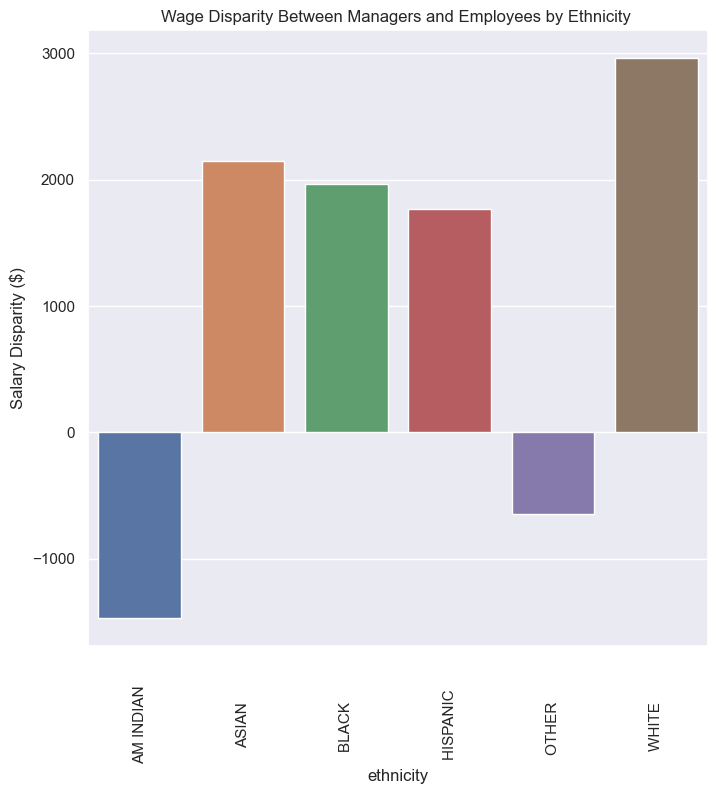

In [49]:
# Bar plot to show wage disparities between managers and employees by department
salary_comparison = salary_comparison.reset_index()

plt.figure(figsize=(8, 8))
sns.barplot(x='ethnicity', y='disparity', data=salary_comparison)
plt.xticks(rotation=90)
plt.title('Wage Disparity Between Managers and Employees by Ethnicity ')
plt.ylabel('Salary Disparity ($)')
plt.show()

#### Analysis on Health and Human Service Commission department: Here, White people faces Higher wage disparity (>2500), Am Indian and other people faces almost zero wage disparity ie. paid  equally

## Task 3 : a) Fetching salaries and total compensations for roles and departments

In [50]:
# Filter rows where total_compensation is not NaN or zero (if needed)
filtered_data = df[df['total_compensation'].notna() & (df['total_compensation'] != 0)]

# Select specific columns: 'agency_name', 'class_title', 'full_name', and 'total_compensation'
result = filtered_data[['agency_name', 'class_title', 'full_name', 'total_compensation']]

result

,agency_name,class_title,full_name,total_compensation
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",MORTON RUCKER V,16857.24
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",JOHN SPECIA JR J,16857.24
7,TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL ...,DIRECTOR IV ...,DARREL SPINKS D,51383.40
20,SCHOOL FOR THE BLIND AND VISUALLY IMPAIRED ...,VEHICLE DRIVER II ...,EVELYN GRANGER F,15450.00
22,SCHOOL FOR THE BLIND AND VISUALLY IMPAIRED ...,RESIDENT SPECIALIST III ...,ANDREW KICKERTZ D,15300.00
24,SCHOOL FOR THE BLIND AND VISUALLY IMPAIRED ...,RESIDENT SPECIALIST III ...,JONIKA MCCORMICK M,15516.00
26,SCHOOL FOR THE BLIND AND VISUALLY IMPAIRED ...,LIBRARY ASST III ...,RAYMOND MILLIKIN T,19146.00
28,SCHOOL FOR THE BLIND AND VISUALLY IMPAIRED ...,ADMINISTRATIVE ASST II ...,AMANDA PEREZ M,17558.52
30,SCHOOL FOR THE DEAF ...,NURSE II ...,JULIE SALEM A,28236.96
32,SCHOOL FOR THE DEAF ...,RESIDENT SPECIALIST I ...,TYLER HEISEY D,9099.96


#### Analysis: There are 16 peopel who are beneficial with their compensation, Director's of Agency - David Nelson & Darrel Spinks D are high beneficial of around (50000), Mina Strother C, paid for 6000 which are less in the total compensation category.

## Task 3 : b) Fetching Head count over the period of time

#### fetching the year from employee_date by converting employee_date into Year

In [51]:
#formatting date, month, year based on requirements to do further
df_1['employee_date'] = pd.to_datetime(df_1['employee_date'], format='%m/%d/%y').dt.strftime('%d/%m/%Y')
df_1

,agency_name,full_name,class_title,ethnicity,gender,status,employee_date,hourly_rate,hours_per_week,monthly_income,state_number,summed_annual_salary,total_compensation
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",MORTON RUCKER V,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,18/02/1988,75.96150,29.0,9545.82,127717,131407.08,16857.24
1,OFFICE OF COURT ADMINISTRATION ...,MORTON RUCKER V,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,01/02/2015,81.04454,4.0,1404.77,127717,NaN,NaN
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",JOHN SPECIA JR J,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,01/02/2020,75.96150,29.0,9545.82,59115,131407.08,16857.24
3,OFFICE OF COURT ADMINISTRATION ...,JOHN SPECIA JR J,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,01/09/2018,81.04453,4.0,1404.77,59115,NaN,NaN
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ESTHER ONTIVEROS,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,29/06/2020,0.00000,40.0,3284.27,165030,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,STATE PRESERVATION BOARD ...,JOHN WESSELS P,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,30/10/2017,0.00000,40.0,2899.00,770781,NaN,NaN
149477,STATE PRESERVATION BOARD ...,EVAN WINDHAM A,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,13/07/2015,0.00000,40.0,5500.00,847431,NaN,NaN
149478,STATE PRESERVATION BOARD ...,DERRICK WRIGHT C,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,15/10/2012,12.93000,20.0,1120.60,34266,NaN,NaN
149479,STATE PRESERVATION BOARD ...,DOUGLAS YOUNG R,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,22/09/1989,0.00000,40.0,5744.16,123490,NaN,NaN


In [52]:
from datetime import datetime
df_1['employee_date'] = pd.to_datetime(df_1['employee_date'], format='%d/%m/%Y')

df_1['employee_date'] = df_1['employee_date'].apply(lambda x: x if x.year < datetime.now().year else x.replace(year=x.year - 100))

df_1['Year'] = df_1['employee_date'].dt.year
df_1['Month'] = df_1['employee_date'].dt.month
df_1['Date'] = df_1['employee_date'].dt.day
df_1.head()

,agency_name,full_name,class_title,ethnicity,gender,status,employee_date,hourly_rate,hours_per_week,monthly_income,state_number,summed_annual_salary,total_compensation,Year,Month,Date
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",MORTON RUCKER V,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,1988-02-18,75.96150,29.0,9545.82,127717,131407.08,16857.24,1988,2,18
1,OFFICE OF COURT ADMINISTRATION ...,MORTON RUCKER V,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,2015-02-01,81.04454,4.0,1404.77,127717,NaN,NaN,2015,2,1
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",JOHN SPECIA JR J,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,2020-02-01,75.96150,29.0,9545.82,59115,131407.08,16857.24,2020,2,1
3,OFFICE OF COURT ADMINISTRATION ...,JOHN SPECIA JR J,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,2018-09-01,81.04453,4.0,1404.77,59115,NaN,NaN,2018,9,1
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ESTHER ONTIVEROS,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2020-06-29,0.00000,40.0,3284.27,165030,NaN,NaN,2020,6,29


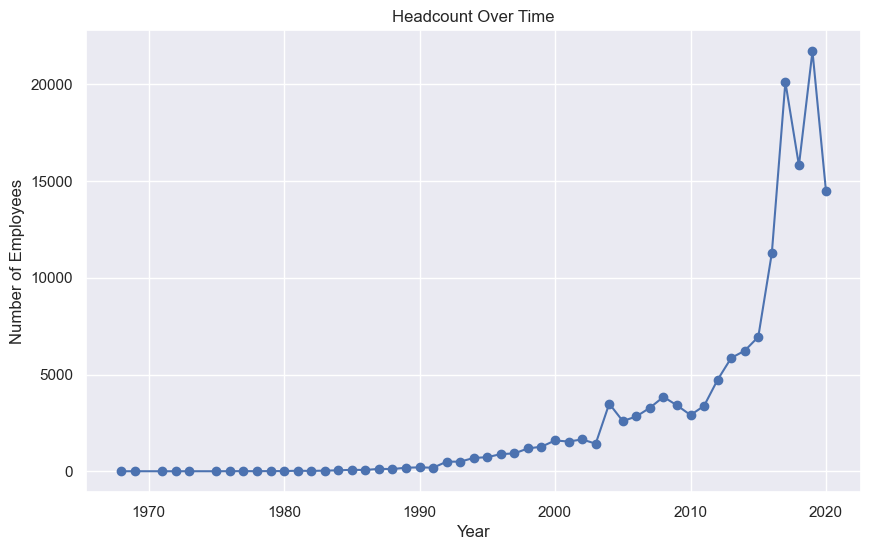

In [53]:
# Group by year and count employees
headcount_trend = df_1.groupby('Year')['full_name'].count()
# print(headcount_trend)
# Plot headcount trends
plt.figure(figsize=(10, 6))
plt.plot(headcount_trend.index, headcount_trend.values, marker='o')
plt.title('Headcount Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Employees')
plt.grid(True)
plt.show()

#### Analysis: There is gradual increase in no. of employee from the year of (1990-2015), after that there will be sudden layoff (counts - 5000) and sudden recuritment (counts - 6000) between the year 2015 - 2020. In the year of 2018, highest number of people (counts - 22000) are working in the agency.

## Feature Engineering

In [54]:
df_1['years_of_service'] = 2020- df_1['Year']  #as the data was last updated on (20.5.2020)

In [55]:
df_1 = df_1.drop(['summed_annual_salary','total_compensation','employee_date'],axis = 1)

In [56]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146864 entries, 0 to 149480
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   agency_name       146864 non-null  object 
 1   full_name         146864 non-null  object 
 2   class_title       146864 non-null  object 
 3   ethnicity         146864 non-null  object 
 4   gender            146864 non-null  object 
 5   status            146864 non-null  object 
 6   hourly_rate       146864 non-null  float64
 7   hours_per_week    146864 non-null  float64
 8   monthly_income    146864 non-null  float64
 9   state_number      146864 non-null  int64  
 10  Year              146864 non-null  int64  
 11  Month             146864 non-null  int64  
 12  Date              146864 non-null  int64  
 13  years_of_service  146864 non-null  int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 20.8+ MB


In [57]:
df_1.columns

Index(['agency_name', 'full_name', 'class_title', 'ethnicity', 'gender',
       'status', 'hourly_rate', 'hours_per_week', 'monthly_income',
       'state_number', 'Year', 'Month', 'Date', 'years_of_service'],
      dtype='object')

In [58]:
df_1.to_csv("final_preprocessed.csv")

In [59]:
df2 = pd.read_csv("final_preprocessed.csv")
df2

,Unnamed: 0,agency_name,full_name,class_title,ethnicity,gender,status,hourly_rate,hours_per_week,monthly_income,state_number,Year,Month,Date,years_of_service
0,0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",MORTON RUCKER V,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,9545.82,127717,1988,2,18,32
1,1,OFFICE OF COURT ADMINISTRATION ...,MORTON RUCKER V,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04454,4.0,1404.77,127717,2015,2,1,5
2,2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",JOHN SPECIA JR J,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,9545.82,59115,2020,2,1,0
3,3,OFFICE OF COURT ADMINISTRATION ...,JOHN SPECIA JR J,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04453,4.0,1404.77,59115,2018,9,1,2
4,4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ESTHER ONTIVEROS,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,3284.27,165030,2020,6,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146859,149476,STATE PRESERVATION BOARD ...,JOHN WESSELS P,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,2899.00,770781,2017,10,30,3
146860,149477,STATE PRESERVATION BOARD ...,EVAN WINDHAM A,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,5500.00,847431,2015,7,13,5
146861,149478,STATE PRESERVATION BOARD ...,DERRICK WRIGHT C,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,12.93000,20.0,1120.60,34266,2012,10,15,8
146862,149479,STATE PRESERVATION BOARD ...,DOUGLAS YOUNG R,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,5744.16,123490,1989,9,22,31


In [60]:
for column in df2.select_dtypes(include='object').columns:
    print(f"Value counts for column '{column}':")
    print("                      ")
    print(df2[column].value_counts())
    print("                       ")
    print("********************************END**************************************")
    print("                        ")

Value counts for column 'agency_name':
                      
HEALTH AND HUMAN SERVICES COMMISSION                  36329
TEXAS DEPARTMENT OF CRIMINAL JUSTICE                  35903
TEXAS DEPARTMENT OF TRANSPORTATION                    12889
DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES          12564
DEPARTMENT OF PUBLIC SAFETY                           10027
                                                      ...  
HEALTH PROFESSIONS COUNCIL                                7
BOARD OF PROFESSIONAL GEOSCIENTISTS                       5
BOARD OF PROFESSIONAL LAND SURVEYING                      4
OFFICE OF STATE PROSECUTING ATTORNEY                      3
TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL                 1
Name: agency_name, Length: 113, dtype: int64
                       
********************************END**************************************
                        
Value counts for column 'full_name':
                      
JOSE         MARTINEZ     A    7
JESUS        GARC

#### Label Encoder is a technique used to convert categorical labels (non-numeric data) into a numerical format.

In [62]:
# converting categorical columns into numerical columns using label encoder
from sklearn.preprocessing import LabelEncoder
import joblib
le_agency_name = LabelEncoder()
le_class_title = LabelEncoder()
le_full_name = LabelEncoder()
le_ethnicity = LabelEncoder()
le_gender = LabelEncoder()
le_status = LabelEncoder()

df_1['agency_name'] = le_agency_name.fit_transform(df_1['agency_name'])
joblib.dump(le_agency_name,"agency_name.pkl")
df_1['class_title'] = le_class_title.fit_transform(df_1['class_title'])
joblib.dump(le_class_title,"class_title.pkl")
df_1['full_name'] = le_full_name.fit_transform(df_1['full_name'])
joblib.dump(le_full_name,"full_name.pkl")
df_1['ethnicity'] = le_ethnicity.fit_transform(df_1['ethnicity'])
joblib.dump(le_ethnicity,"ethnicity.pkl")
df_1['gender'] = le_gender.fit_transform(df_1['gender'])
joblib.dump(le_gender,"gender.pkl")
df_1['status'] = le_status.fit_transform(df_1['status'])
joblib.dump(le_status,"status.pkl")

df_1

,agency_name,full_name,class_title,ethnicity,gender,status,hourly_rate,hours_per_week,monthly_income,state_number,Year,Month,Date,years_of_service
0,17,101652,625,5,1,8,75.96150,29.0,9545.82,127717,1988,2,18,32
1,48,101652,482,5,1,4,81.04454,4.0,1404.77,127717,2015,2,1,5
2,17,67107,625,5,1,8,75.96150,29.0,9545.82,59115,2020,2,1,0
3,48,67107,482,5,1,4,81.04453,4.0,1404.77,59115,2018,9,1,2
4,88,45629,250,3,0,0,0.00000,40.0,3284.27,165030,2020,6,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,76,67227,1092,5,1,0,0.00000,40.0,2899.00,770781,2017,10,30,3
149477,76,45994,1291,5,0,0,0.00000,40.0,5500.00,847431,2015,7,13,5
149478,76,37363,280,5,1,1,12.93000,20.0,1120.60,34266,2012,10,15,8
149479,76,40083,909,5,1,0,0.00000,40.0,5744.16,123490,1989,9,22,31


In [63]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146864 entries, 0 to 149480
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   agency_name       146864 non-null  int64  
 1   full_name         146864 non-null  int32  
 2   class_title       146864 non-null  int32  
 3   ethnicity         146864 non-null  int32  
 4   gender            146864 non-null  int32  
 5   status            146864 non-null  int32  
 6   hourly_rate       146864 non-null  float64
 7   hours_per_week    146864 non-null  float64
 8   monthly_income    146864 non-null  float64
 9   state_number      146864 non-null  int64  
 10  Year              146864 non-null  int64  
 11  Month             146864 non-null  int64  
 12  Date              146864 non-null  int64  
 13  years_of_service  146864 non-null  int64  
dtypes: float64(3), int32(5), int64(6)
memory usage: 18.0 MB


### scaling - STANDARD SCALER

In [64]:
X = df_1.drop(['monthly_income'],axis = 1)
y = df_1.monthly_income

In [65]:
# scaling and splitting is done for further model building (80% - Training, 20% - Testing)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test = train_test_split(X,y, 
                                                 test_size = 0.2, 
                                                 random_state=1, 
                                                 shuffle = True)

#### Scaling: Adjusting the range of data into certain range, often between 0 and 1, or -1 and 1. This ensures that different features contribute proportionally to distance-based metrics used by many models.
#### Standard scaler: The StandardScaler is a common scaling method that transforms data to have a mean of 0 and a standard deviation of 1. It centers the data by subtracting the mean and then scales it by the standard deviation, which is helpful when the features follow a normal distribution.

In [66]:
sc = StandardScaler() # scaling done on independent features
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [67]:
import joblib
joblib.dump(sc,"scaling_training.pkl")

['scaling_training.pkl']

In [68]:
scaler = StandardScaler() # scaling done on dependent feature
y_train = np.array([y_train])
y_test = np.array([y_test])

y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = scaler.transform(y_test.reshape(-1, 1)).ravel()

In [69]:
joblib.dump(scaler,"scaling_testing.pkl")

['scaling_testing.pkl']

## Model building - Linear regression

In [115]:
# importing the library for model and fitting into the data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score,mean_absolute_error

lr = LinearRegression()
lr.fit(X_train_scaled,y_train_scaled)

LinearRegression()

In [116]:
# prediction is done on testing data
prediction = lr.predict(X_test_scaled)
# comparing the result with original data
mse_lr = mean_squared_error(y_test_scaled, prediction)
mae_lr = mean_absolute_error(y_test_scaled, prediction)
r2_lr = r2_score(y_test_scaled, prediction)
rmse_lr = np.sqrt(mse_lr)

print("Mean Squared Error:", mse_lr)
print("Mean Absolute Error:",mae_lr)
print("R-Squared:", r2_lr)
print("Root Mean Square Error:",rmse_lr)

Mean Squared Error: 0.7793375777281013
Mean Absolute Error: 0.6499011824674306
R-Squared: 0.22035309430285066
Root Mean Square Error: 0.8828009842133737


## Model building - Ridge

In [117]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train_scaled)

Ridge()

In [118]:
prediction = ridge.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test_scaled, prediction)
mae_ridge = mean_absolute_error(y_test_scaled, prediction)
r2_ridge = r2_score(y_test_scaled, prediction)
rmse_ridge = np.sqrt(mse_ridge)

print("Mean Squared Error:", mse_ridge)
print("Mean Absolute Error:",mae_ridge)
print("R-Squared:", r2_ridge)
print("Root Mean Square Error:",rmse_ridge)

Mean Squared Error: 0.7793375808031991
Mean Absolute Error: 0.6499011755247079
R-Squared: 0.22035309122653213
Root Mean Square Error: 0.8828009859550447


##  Model building - Random forest

In [66]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, verbose=3, random_state=0)
rf.fit(X_train_scaled,y_train_scaled)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.1min finished


RandomForestRegressor(random_state=0, verbose=3)

In [68]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score,mean_absolute_error
prediction = rf.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test_scaled, prediction)
mae_rf = mean_absolute_error(y_test_scaled, prediction)
r2_rf = r2_score(y_test_scaled,prediction)
rmse_rf = np.sqrt(mse_rf)

print("Mean Squared Error:", mse_rf)
print("Mean Absolute Error:",mae_rf)
print("R-Squared:", r2_rf)
print("Root Mean Square Error:",rmse_rf)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Mean Squared Error: 0.07402230097777458
Mean Absolute Error: 0.1441135397752673
R-Squared: 0.9259483187271131
Root Mean Square Error: 0.27207039709930697


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.8s finished


In [69]:
joblib.dump(rf,"best_model_rf.pkl")

['best_model_rf.pkl']

## Model building - Decision Tree

In [121]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train_scaled, y_train_scaled)

DecisionTreeRegressor(max_depth=5)

In [122]:
prediction = dt.predict(X_test_scaled)

mse_dt = mean_squared_error(y_test_scaled, prediction)
mae_dt = mean_absolute_error(y_test_scaled, prediction)
r2_dt = r2_score(y_test_scaled,prediction)
rmse_dt = np.sqrt(mse_dt)

print("Mean Squared Error:", mse_dt)
print("Mean Absolute Error:",mae_dt)
print("R-Squared:", r2_dt)
print("Root Mean Square Error:",rmse_dt)

Mean Squared Error: 0.5406495939200632
Mean Absolute Error: 0.5134752876768007
R-Squared: 0.45913581609270493
Root Mean Square Error: 0.7352887826698182


### Model building - XGBoost

In [123]:
import xgboost as xgb

xgb = xgb.XGBRegressor(n_estimators=100,verbose = 3, learning_rate=0.1)
xgb.fit(X_train_scaled, y_train_scaled)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [124]:
prediction = xgb.predict(X_test_scaled)

mse_xgb = mean_squared_error(y_test_scaled, prediction)
mae_xgb = mean_absolute_error(y_test_scaled, prediction)
r2_xgb = r2_score(y_test_scaled,prediction)
rmse_xgb = np.sqrt(mse_xgb)

print("Mean Squared Error:", mse_xgb)
print("Mean Absolute Error:",mae_xgb)
print("R-Squared:", r2_xgb)
print("Root Mean Square Error:",rmse_xgb)

Mean Squared Error: 0.20419013567583066
Mean Absolute Error: 0.2730279727081877
R-Squared: 0.7957288189315522
Root Mean Square Error: 0.4518740263345866


## Model building - KNN

In [125]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train_scaled,y_train_scaled)

KNeighborsRegressor()

In [126]:
prediction = knn.predict(X_test_scaled)

mse_knn = mean_squared_error(y_test_scaled, prediction)
mae_knn = mean_absolute_error(y_test_scaled, prediction)
r2_knn = r2_score(y_test_scaled,prediction)
rmse_knn = np.sqrt(mse_knn)

print("Mean Squared Error:", mse_knn)
print("Mean Absolute Error:",mae_knn)
print("R-Squared:", r2_knn)
print("Root Mean Square Error:",rmse_knn)

Mean Squared Error: 0.6876809952119197
Mean Absolute Error: 0.5432908692730096
R-Squared: 0.31204605636151783
Root Mean Square Error: 0.8292653346257275


## Performance and comparison metrics

In [127]:
# plotting graphs on various model to find the better model in terms of performance matrics
result = {'Linear Regression' : (mse_lr,rmse_lr,mae_lr,r2_lr),
          'Ridge' : (mse_ridge,mae_ridge,rmse_ridge,r2_ridge),
          'K-Nearest Neighbor' : (mse_knn,rmse_knn,mae_knn,r2_knn),
          'Decision Tree' : (mse_dt,rmse_dt,mae_dt,r2_dt),
          'XGBoost' : (mse_xgb,rmse_xgb,mae_xgb,r2_xgb),
          'Random Forest' : (mse_rf,rmse_rf,mae_rf,r2_rf)
}

result = pd.DataFrame(result, index = ['Mean Squared Error','Root Mean Square Error','Mean Absolute Error','R-Squared Error'])

In [128]:
result = result.round(decimals = 4) #rounding of 4 decimal place
result

,Linear Regression,Ridge,K-Nearest Neighbor,Decision Tree,XGBoost,Random Forest
Mean Squared Error,0.7793,0.7793,0.6877,0.5406,0.2042,0.0740
Root Mean Square Error,0.8828,0.6499,0.8293,0.7353,0.4519,0.2721
Mean Absolute Error,0.6499,0.8828,0.5433,0.5135,0.2730,0.1441
R-Squared Error,0.2204,0.2204,0.3120,0.4591,0.7957,0.9259


In [132]:
result.to_csv('final_results.csv')

#### Analysis : MSE,RMSE,MAE should always be lesser value(nearby '0'), R-Squared Error should always be greater value(nearby '1'), when comes to prediction of texas salary prediction Linear Regression and KNN does not perform well, where as XGBoost, Random Forest performs well with texas salary prediction

## Visualization

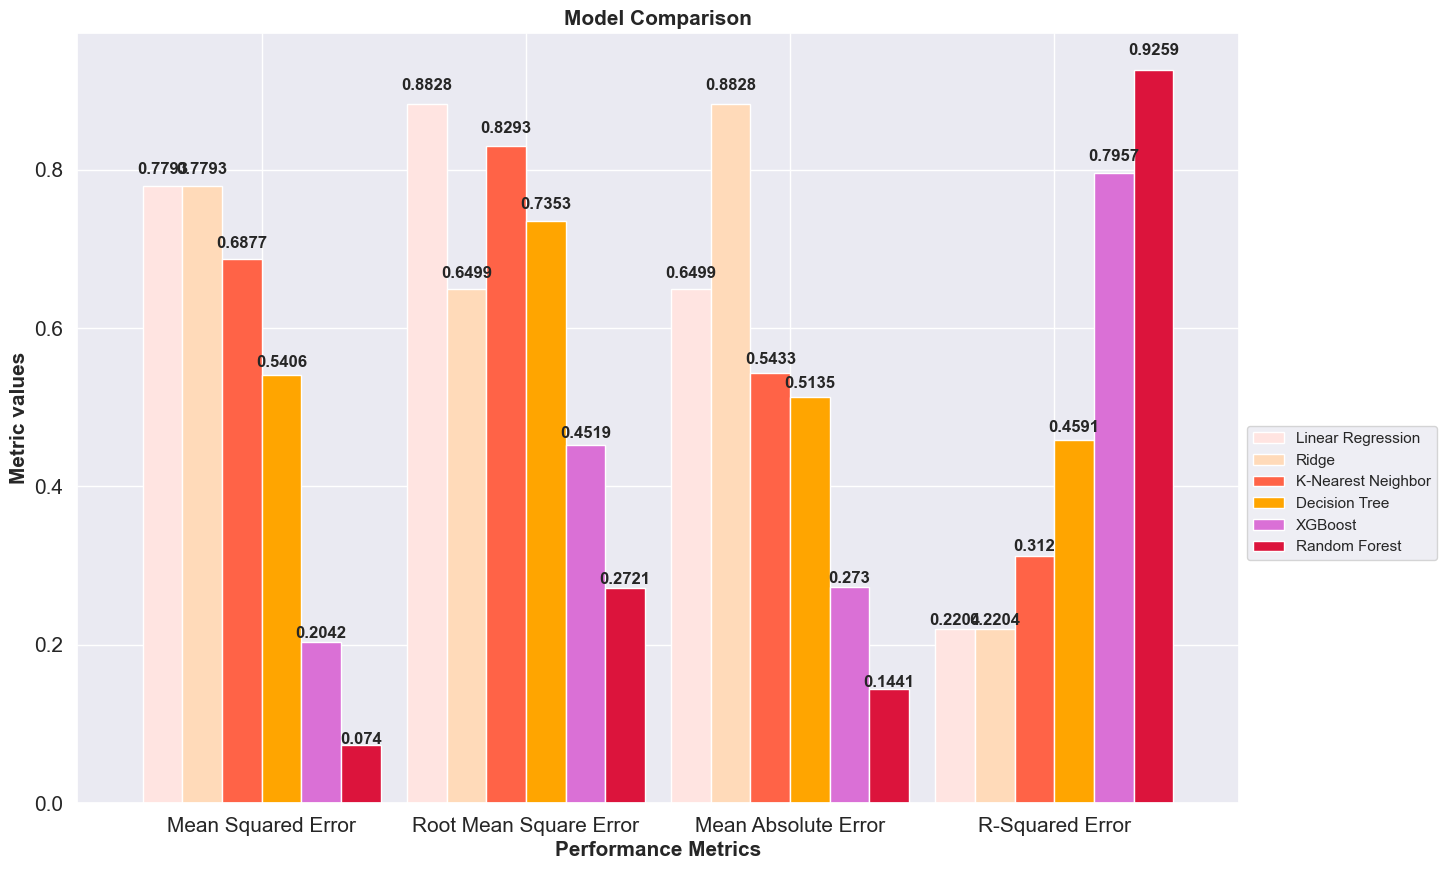

In [129]:
# plotting colored bar graphs for showing the variation
colors_list=['mistyrose','peachpuff','tomato','orange','orchid','crimson']
ax = result.plot(kind='bar', figsize=(15,10), width=0.9, color=colors_list, edgecolor=None, fontsize=15)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center',fontweight='bold')

plt.title("Model Comparison",size=15,fontweight="bold")
plt.xlabel("Performance Metrics",size=15,fontweight="bold")
plt.ylabel("Metric values",size=15,fontweight="bold")

plt.xticks(rotation = 0)
plt.legend(bbox_to_anchor =(1, 0.5))
plt.show()

#### Analysis: Based on the above performance metrics, compared to other model Random forest will have very less value error MSE,RMSE,MAE and having high value of R-squared error. So the better model for production could be Random forest regressor.

## Hyper-parameter tuning

In [137]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

X = df_1.drop(['monthly_income'],axis = 1)
y = df_1.monthly_income

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Standardize the data (important for some models like KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [149]:
# Creating a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_model', LinearRegression())
])

# parameter 
linear_params = {'linear_model__fit_intercept': [True, False]}
linear_grid = GridSearchCV(pipeline, param_grid=linear_params, cv=5, scoring='neg_mean_squared_error')
linear_grid.fit(X_train_scaled, y_train)

# Output
print(f"Best Linear Regression Params: {linear_grid.best_params_}")



Best Linear Regression Params: {'linear_model__fit_intercept': True}


In [173]:
# Creating a pipeline 
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge_model', Ridge())
])

# parameter 
ridge_params = {
    'ridge_model__alpha': [0.01, 0.1, 1, 10, 100], 
    'ridge_model__fit_intercept': [True, False]
}
ridge_grid = GridSearchCV(pipeline, param_grid=ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_scaled, y_train)

# Output
print(f"Best Ridge Params: {ridge_grid.best_params_}")

Best Ridge Params: {'ridge_model__alpha': 100, 'ridge_model__fit_intercept': True}


In [152]:
# Creating a pipeline 
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn_model', KNeighborsRegressor())
])
#parameter 
knn_params = {
    'knn_model__n_neighbors': [3, 5], 
#     'knn_model__weights': ['uniform', 'distance'], 
#     'knn_model__metric': ['euclidean', 'manhattan']
}
knn_grid = GridSearchCV(pipeline, param_grid=knn_params, cv=2, scoring='neg_mean_squared_error')
knn_grid.fit(X_train_scaled, y_train)

# output
print(f"Best KNN Params: {knn_grid.best_params_}")

Best KNN Params: {'knn_model__n_neighbors': 5}


In [153]:
# Creating a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('tree_model', DecisionTreeRegressor(random_state=42))
])

# parameter 
tree_params = {
    'tree_model__max_depth': [None, 10, 20], 
#     'tree_model__min_samples_split': [2, 5], 
#     'tree_model__min_samples_leaf': [1, 2]
}
tree_grid = GridSearchCV(pipeline, param_grid=tree_params, cv=5, scoring='neg_mean_squared_error')
tree_grid.fit(X_train_scaled, y_train)

# Output
print(f"Best Decision Tree Params: {tree_grid.best_params_}")



Best Decision Tree Params: {'tree_model__max_depth': 20}


In [175]:
# Creating a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf_model', RandomForestRegressor(random_state=42))
])

# parameter 
rf_params = {
    'rf_model__n_estimators': [10, 100]
#     'rf_model__max_depth': [None, 10, 20],
#     'rf_model__min_samples_split': [2, 5, 10],
#     'rf_model__min_samples_leaf': [1, 2, 4]
}
rf_grid = RandomizedSearchCV(pipeline, param_distributions=rf_params, cv=2, 
                             scoring='neg_mean_squared_error', n_iter=10, random_state=42,verbose=1)
rf_grid.fit(X_train_scaled, y_train)

# Output
print(f"Best Random Forest Params: {rf_grid.best_params_}")

Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best Random Forest Params: {'rf_model__n_estimators': 100}


In [159]:
# Creating a pipeling
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb_model', XGBRegressor(random_state=42))
])

# parameter
xgb_params = {
    'xgb_model__n_estimators': [100,200],
    'xgb_model__max_depth': [5, 10],
    'xgb_model__learning_rate': [0.01, 0.1],
#     'xgb_model__min_child_weight': [1, 2, 3],
#     'xgb_model__subsample': [0.8, 0.9, 1.0]
}
xgb_grid = RandomizedSearchCV(pipeline, param_distributions=xgb_params, 
                               cv=5, scoring='neg_mean_squared_error', 
                               n_iter=10, random_state=42)
xgb_grid.fit(X_train_scaled, y_train)

# Output
print(f"Best XGBoost Params: {xgb_grid.best_params_}")



Best XGBoost Params: {'xgb_model__n_estimators': 200, 'xgb_model__max_depth': 10, 'xgb_model__learning_rate': 0.1}


## Finding the MSE value to find the best model

In [165]:
# Linear Regression
linear_best_model = linear_grid.best_estimator_
linear_predictions = linear_best_model.predict(X_test_scaled)
linear_mse = mean_squared_error(y_test, linear_predictions)
print(f"Linear Regression MSE: {linear_mse}")

Linear Regression MSE: 2122740.4031221364


In [174]:
# Ridge
ridge_best_model = ridge_grid.best_estimator_
ridge_predictions = ridge_best_model.predict(X_test_scaled)

# Calculate and print MSE
ridge_mse = mean_squared_error(y_test, ridge_predictions)
print(f"Ridge MSE: {ridge_mse}")

Ridge MSE: 2122751.6425841893


In [167]:
# KNN 
knn_best_model = knn_grid.best_estimator_
knn_predictions = knn_best_model.predict(X_test_scaled)
knn_mse = mean_squared_error(y_test, knn_predictions)
print(f"KNN MSE: {knn_mse}")

KNN MSE: 1852707.1484321016


In [168]:
# Decision Tree 
tree_best_model = tree_grid.best_estimator_
tree_predictions = tree_best_model.predict(X_test_scaled)
tree_mse = mean_squared_error(y_test, tree_predictions)
print(f"Decision Tree MSE: {tree_mse}")

Decision Tree MSE: 345090.7492264702


In [176]:
# Random Forest
rf_best_model = rf_grid.best_estimator_
rf_predictions = rf_best_model.predict(X_test_scaled)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest MSE: {rf_mse}")

Random Forest MSE: 208083.58481098336


In [170]:
# XGBoost
xgb_best_model = xgb_grid.best_estimator_
xgb_predictions = xgb_best_model.predict(X_test_scaled)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
print(f"XGBoost MSE: {xgb_mse}")


XGBoost MSE: 418031.4972989032


In [181]:
mse_dict = {
    'Linear Regression': linear_mse,
    'Ridge': ridge_mse,
    'KNN': knn_mse,
    'Decision Tree': tree_mse,
    'Random Forest': rf_mse,
    'XGBoost': xgb_mse
}

best_model_name = min(mse_dict, key=mse_dict.get)
print(f"The best model is ****{best_model_name}**** with an MSE of {mse_dict[best_model_name]}")

The best model is ****Random Forest**** with an MSE of 208083.58481098336


# Analysis: Model with very less value MEAN SQUARE ERROR is better for prediction. So, from hyper parameter tuning the better model for production could be Random forest regressor.

# Challenges Faced:

## 1. Converting first_name, middle_name, last_name into full_name is difficult
## 2. To find the outliers based on salary is challenging to demonstrate the list of the people
## 3. Grouping of people into manager and non_manager category without any details leads to assumed value, which makes final result is accurate or not
## 4. Seperating date/month/year into date, month, year is challenging part
## 5. When it comes to model building in regression, scaling the dependent feature lead to good results is not known.
## 6. Code to find the best model using Random search CV, Grid search CV is challenging
## 7. Time consumption for running the model is tedious process, by changing the parameter, dropping the parameter facing issue to find the best model